In [1]:
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import autopep8
import datetime
import numpy as np
import scipy.stats as stats
import seaborn as sb

# Import quarterly data

In [2]:
WA_quarterly_df = pd.read_csv('/Users/sylviabroadbent/Dropbox/Sylvia/UWA_Data_Analytics_Bootcamp/HOMEWORK/7 Project 1/Data-Analytics-Project-1/Project 1.2 Processed Data/Construction_WA_Quarterly.csv')
WA_quarterly_df = WA_quarterly_df.rename(columns={'Unnamed: 0': ''})
WA_quarterly_df = WA_quarterly_df.set_index('')
WA_quarterly_df

,dwellings,townhouses,apartments,dwellings_$'000,townhouses_$'000,apartments_$'000,total_permits,total_value
,,,,,,,,
2018Q4,3068,240,247,910726,56850,84852,3555,1052428
2019Q1,2821,299,815,824553,69611,218410,3935,1112574
2019Q2,2996,343,526,878667,74793,171036,3865,1124496
2019Q3,2770,265,799,826658,66966,294430,3834,1188054
2019Q4,2897,268,336,877361,67937,119569,3501,1064867
2020Q1,2718,220,293,830906,53003,89497,3231,973406
2020Q2,2878,196,676,851247,52387,208546,3750,1112180


In [3]:
AU_df = pd.read_csv('/Users/sylviabroadbent/Dropbox/Sylvia/UWA_Data_Analytics_Bootcamp/HOMEWORK/7 Project 1/Data-Analytics-Project-1/Project 1.2 Processed Data/Construction_AU_Quarterly.csv')
AU_df = AU_df.rename(columns={'Unnamed: 0': ''})
AU_df = AU_df.set_index('')
AU_df

,permits_au,value_au
,,
2018Q4,46181,15107274
2019Q1,43091,14062628
2019Q2,43681,14315655
2019Q3,42972,14390276
2019Q4,43616,14496008
2020Q1,42878,13992118
2020Q2,41943,13845277


# Visualisation

## Australia vs WA

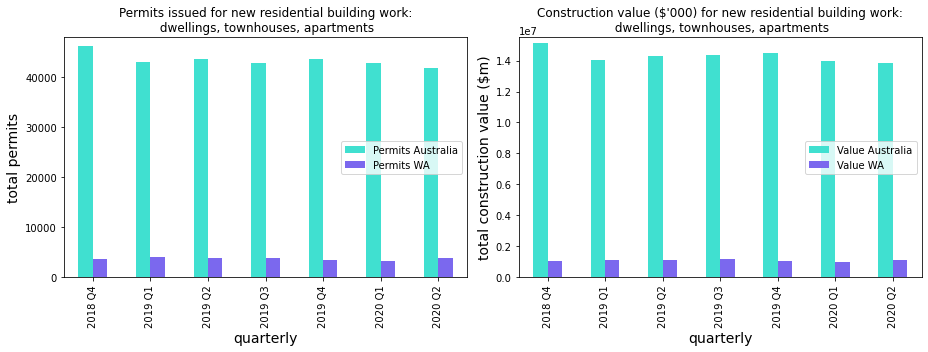

In [4]:
permits_total_df = pd.concat([AU_df['permits_au'], WA_quarterly_df['total_permits']], axis=1)
permits_total_df = permits_total_df.rename(columns={'permits_au': 'Permits Australia', 'total_permits': 'Permits WA'})

value_total_df = pd.concat([AU_df['value_au'], WA_quarterly_df['total_value']], axis=1)
value_total_df = value_total_df.rename(columns={'value_au': 'Value Australia', 'total_value': 'Value WA'})

labels = ['2018 Q4', '2019 Q1', '2019 Q2', '2019 Q3', '2019 Q4', '2020 Q1', '2020 Q2']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

permits_total_df.plot.bar(color=['turquoise', 'mediumslateblue'], ax=ax1)
ax1.set_ylabel('total permits', fontsize=14)
ax1.set_xlabel('quarterly', fontsize=14)
ax1.set_title('Permits issued for new residential building work:\n dwellings, townhouses, apartments', fontsize=12)
ax1.set_xticklabels(labels)
ax1.legend(loc=7)
ax1.set_ylim(0, 48000)

value_total_df.plot.bar(color=['turquoise', 'mediumslateblue'], ax=ax2)
ax2.set_ylabel('total construction value ($m)', fontsize=14)
ax2.set_xlabel('quarterly', fontsize=14)
ax2.set_title("Construction value ($'000) for new residential building work:\n dwellings, townhouses, apartments", fontsize=12)
ax2.set_xticklabels(labels)
ax2.legend(loc=7)
ax2.set_ylim(0, 15500000)

plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('permits_AUvsWA_bar.png') 
plt.show()


## WA: total permits & total value per quarter

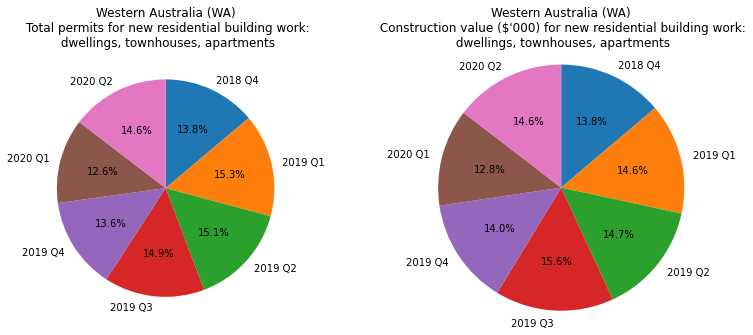

In [5]:
labels = ['2018 Q4', '2019 Q1', '2019 Q2', '2019 Q3', '2019 Q4', '2020 Q1', '2020 Q2']

fig, (ax2, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

WA_quarterly_df.plot.pie(y='total_value', 
        explode=(0,0,0,0,0,0,0), 
        autopct="%1.1f%%", 
        startangle=90,
        counterclock=False,
        labels=labels,
        legend=False,
        ax=ax1)
ax1.set_ylabel('')
ax1.set_title("Western Australia (WA)\n Construction value ($'000) for new residential building work:\n dwellings, townhouses, apartments", fontsize=12)

WA_quarterly_df.plot.pie(
        y='total_permits', 
        explode=(0,0,0,0,0,0,0), 
        autopct="%1.1f%%", 
        startangle=90,
        counterclock=False,
        labels=labels,
        legend=False,
        ax=ax2)
ax2.set_ylabel('')
ax2.set_title("Western Australia (WA)\n Total permits for new residential building work:\n dwellings, townhouses, apartments", fontsize=12)

plt.axis("equal")
plt.savefig('permits_WA_pie.png') 
plt.show()


## WA: types of construction

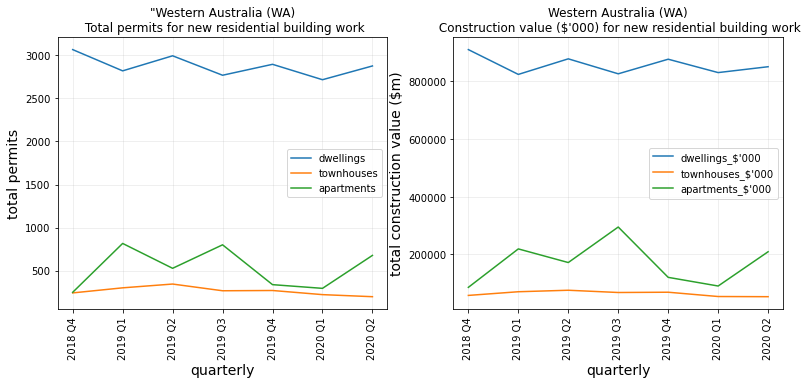

In [6]:
labels = ['2018 Q4', '2019 Q1', '2019 Q2', '2019 Q3', '2019 Q4', '2020 Q1', '2020 Q2']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

permits_linechart_df = WA_quarterly_df.iloc[:, 0:3]
value_linechart_df = WA_quarterly_df.iloc[:, 3:6]

x = range(len(labels))

permits_linechart_df.plot(ax=ax1, grid=True)
ax1.set_title('"Western Australia (WA)\n Total permits for new residential building work', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=90)
ax1.set_ylabel('total permits', fontsize=14)
ax1.set_xlabel('quarterly', fontsize=14)
ax1.grid(alpha=0.25)

value_linechart_df.plot(ax=ax2, grid=True)
ax2.set_title("Western Australia (WA)\n Construction value ($'000) for new residential building work", fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation=90)
ax2.set_ylabel('total construction value ($m)', fontsize=14)
ax2.set_xlabel('quarterly', fontsize=14)
ax2.grid(alpha=0.25)

plt.savefig('permits_WA_line.png') 
plt.show()

# Correlation

## number of permits vs number of grants paid

In [8]:
fhog_df = pd.read_csv('/Users/sylviabroadbent/Dropbox/Sylvia/UWA_Data_Analytics_Bootcamp/HOMEWORK/7 Project 1/Data-Analytics-Project-1/Project 1.2 Processed Data/FHOG Dataframe.csv')
fhog_df

,Date,Established Homes App,New Dwellings App,Total App,Established Homes Paid,New Dwellings Paid,Total Paid
0,2018Q4,14,1498,1512,2,1369,1371
1,2019Q1,12,1298,1310,0,1313,1313
2,2019Q2,9,1404,1413,0,1405,1405
3,2019Q3,0,1394,1394,0,1396,1396
4,2019Q4,0,1491,1491,0,1254,1254
5,2020Q1,0,1462,1462,0,1347,1347
6,2020Q2,0,1388,1388,0,1312,1312


The r-squared is: 0.5971298445529775


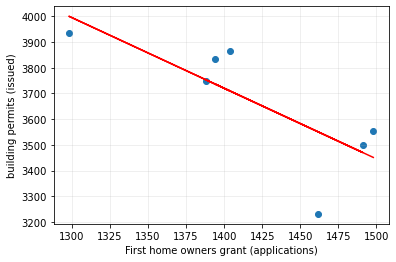

In [16]:
x_values = fhog_df['New Dwellings App']
y_values = WA_quarterly_df['total_permits']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1260,3300),fontsize=15,color="red")
plt.xlabel('First home owners grant (applications)')
plt.ylabel('building permits (issued)')
plt.grid(alpha=0.25)
print(f"The r-squared is: {rvalue**2}")
plt.savefig('fhog_permits.png')
plt.show()

## number of permits vs number of real estate sales